In [15]:
import os
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc, precision_recall_curve


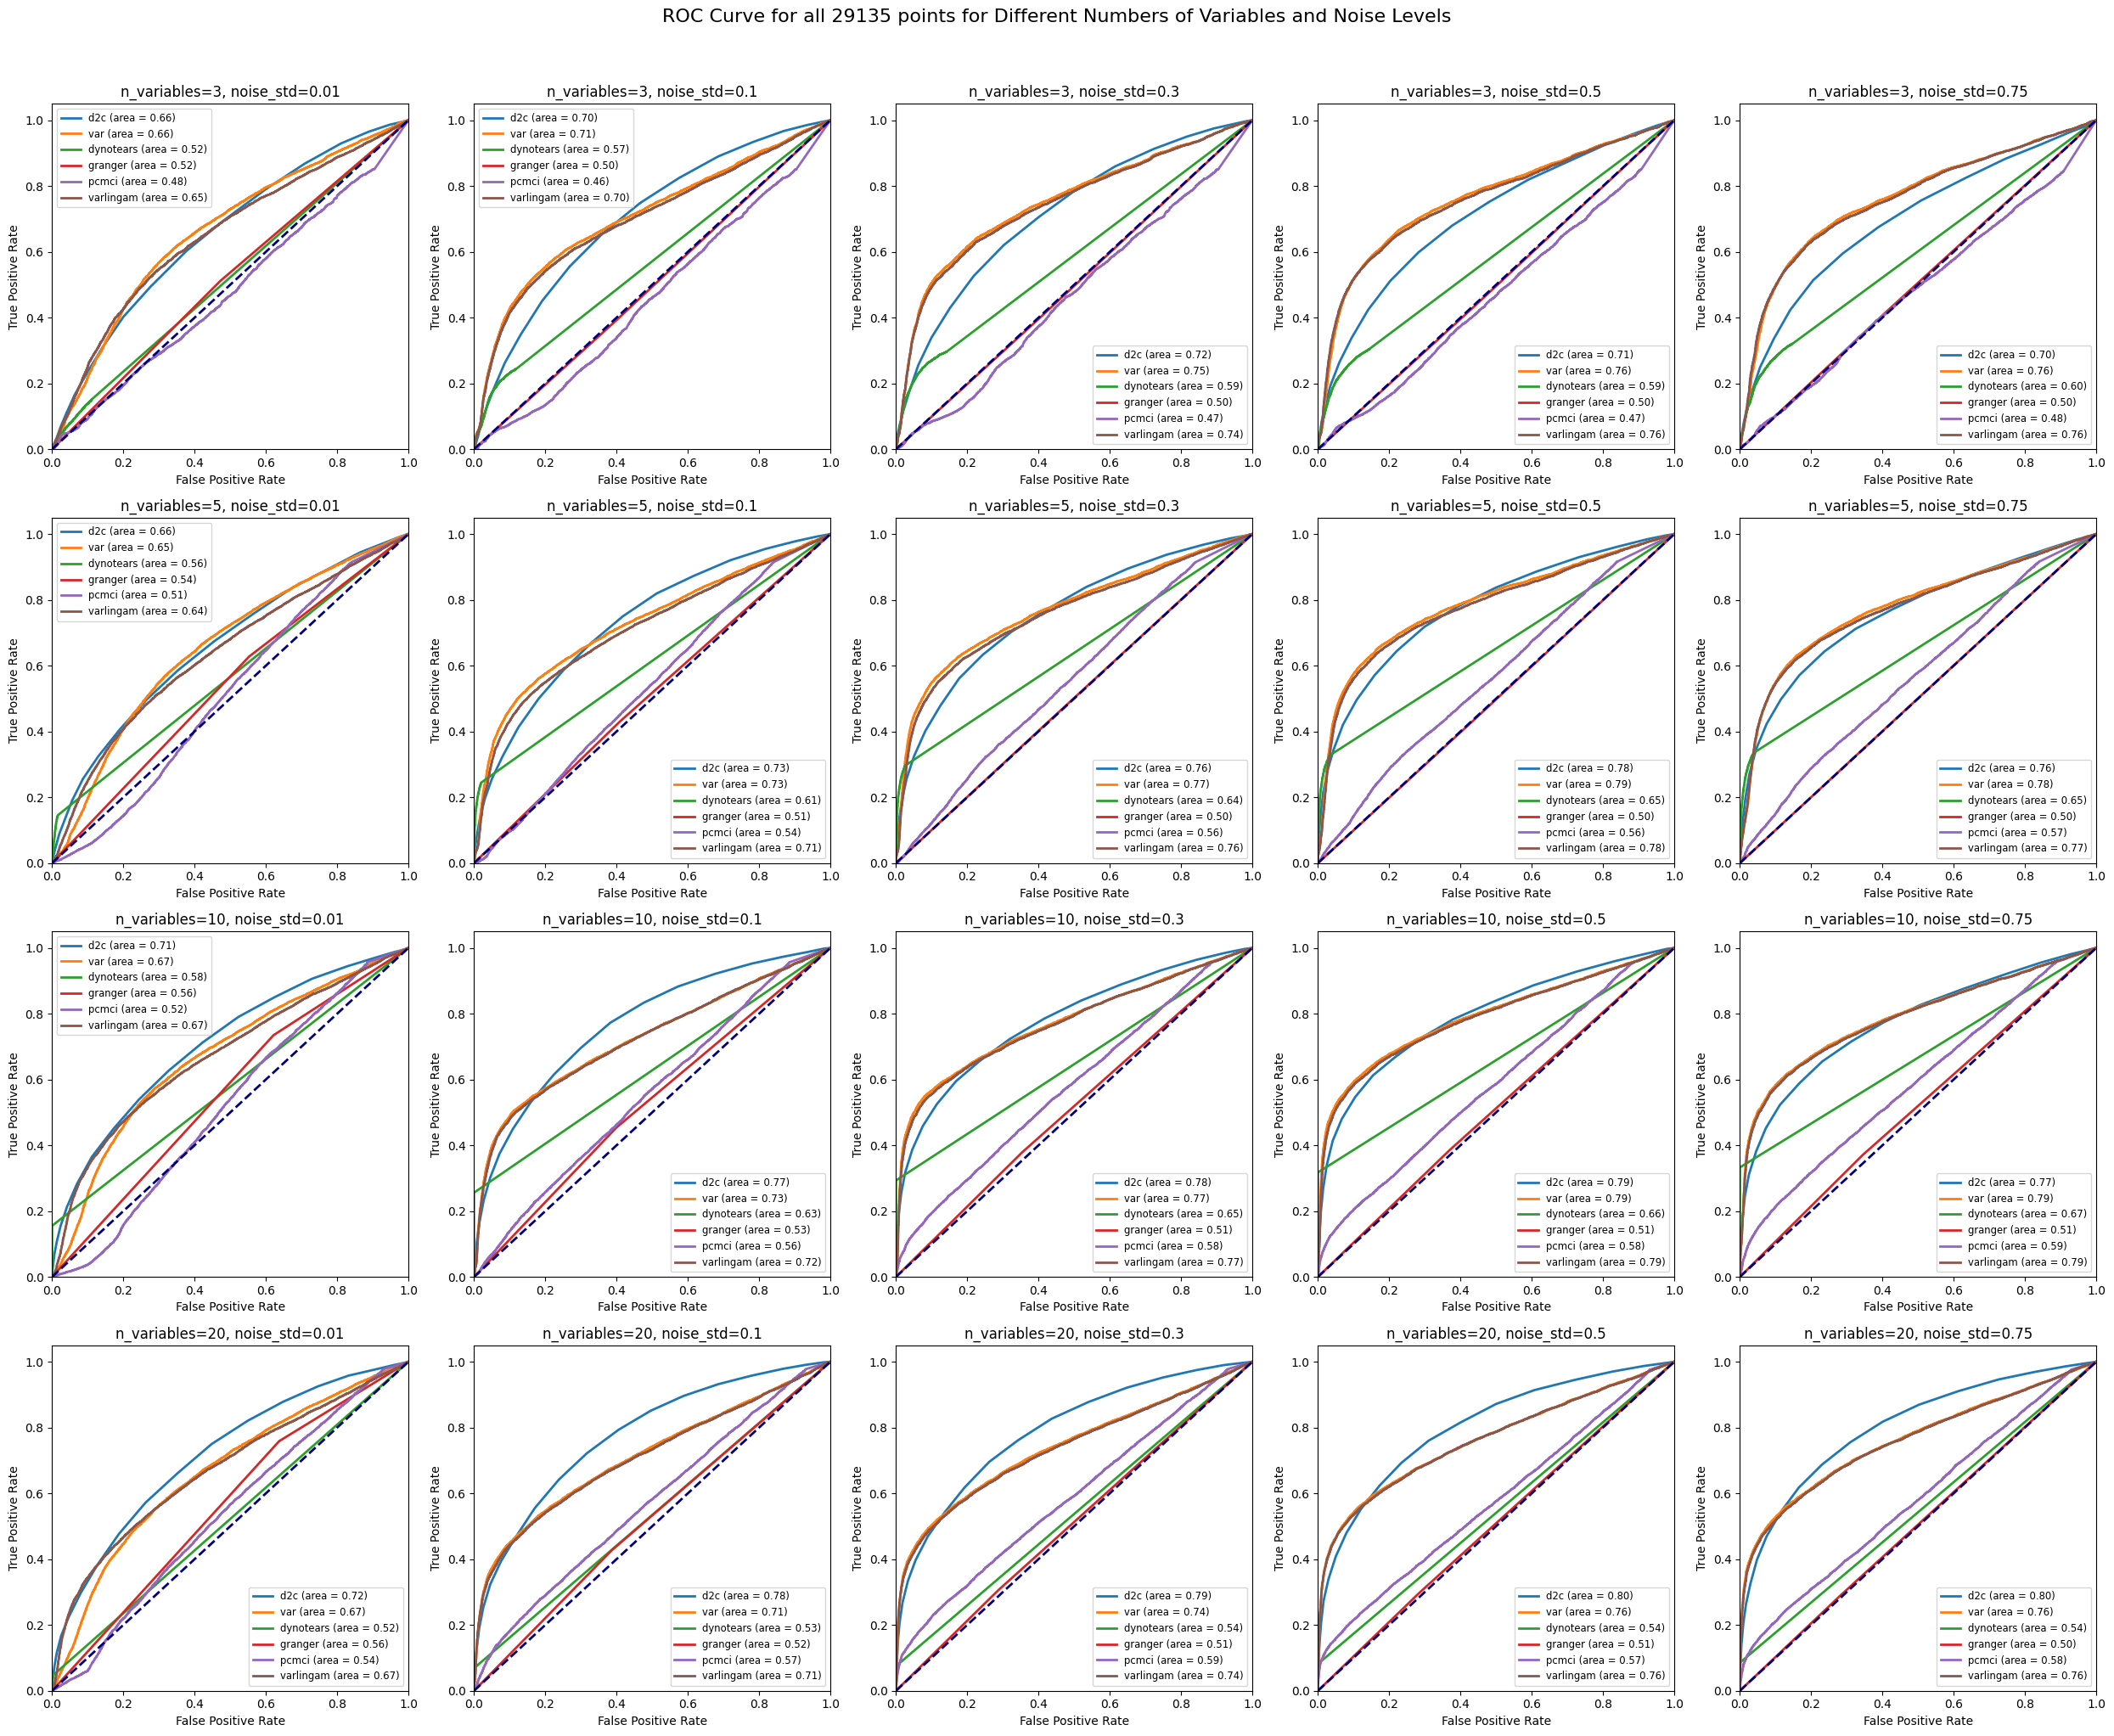

In [11]:
# Define the structure of the grid of plots
n_variables_list = [3, 5, 10, 20]
noise_std_list = [0.01,0.1,0.3, 0.5, 0.75]
n_rows = len(n_variables_list)
n_cols = len(noise_std_list)

# Create a figure with subplots arranged in rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
fig.suptitle(f'ROC Curve for all points for Different Numbers of Variables and Noise Levels', fontsize=16, y=1.02)

for i, n_variables in enumerate(n_variables_list):
    for j, noise_std in enumerate(noise_std_list):
        # Determine the current subplot
        ax = axes[i, j] if n_rows > 1 else axes[j]
        
        for method in ['d2c', 'var','dynotears','granger','pcmci','varlingam']:
        
            pickle_path = os.path.join('..','results', 'predictions', method, f'n{n_variables}_s{noise_std}.pkl')

            with open (pickle_path, 'rb') as f:
                dfpreds = pickle.load(f)

            output_folder = os.path.join('..','results', 'metrics', 'auc_plots')
            os.makedirs(output_folder, exist_ok=True)
            y_true = dfpreds['is_causal']
            y_score = dfpreds['predicted_proba']
            fpr, tpr, _ = roc_curve(y_true, y_score)
            roc_auc = auc(fpr, tpr)

            ax.plot(fpr, tpr, lw=2, label=f'{method} (area = {roc_auc:.2f})')
        ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'n_variables={n_variables}, noise_std={noise_std}')
        ax.legend(loc="best", fontsize='small')

# Adjust layout
plt.tight_layout()
#save
plt.savefig(os.path.join('..','results','metrics','auc_plots','roc_auc.png'))
plt.show()


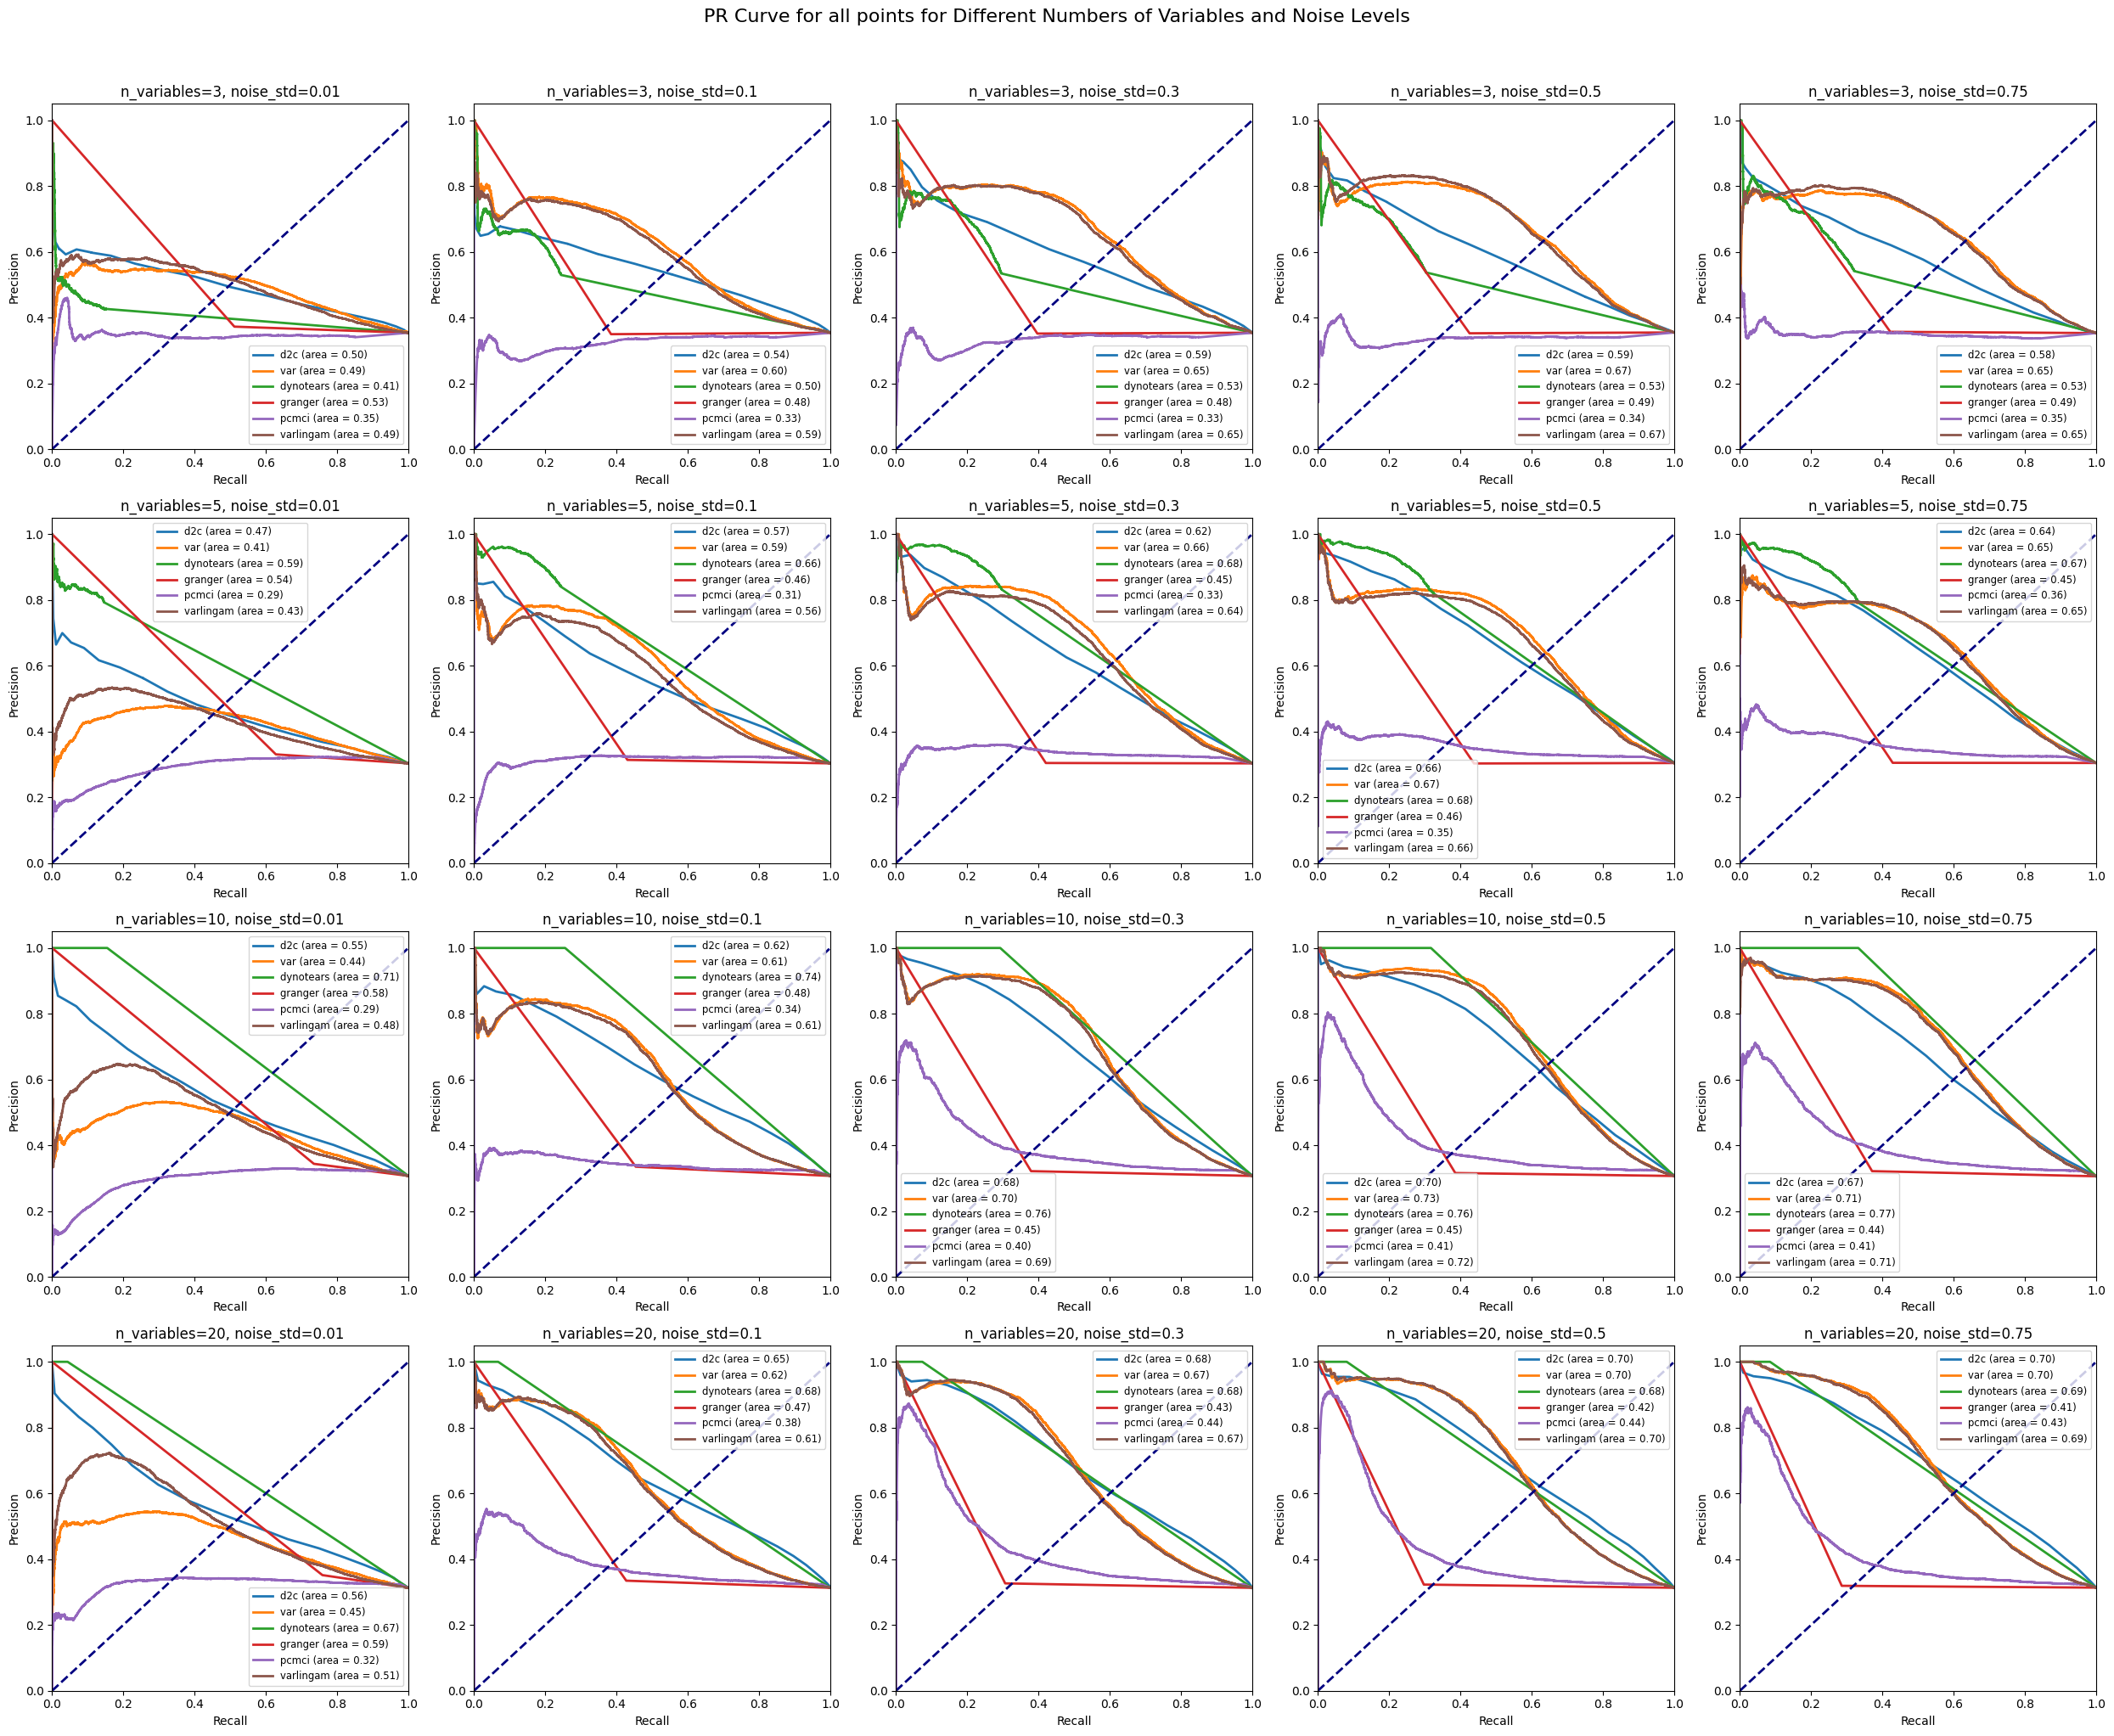

In [19]:
# Define the structure of the grid of plots
n_variables_list = [3, 5, 10, 20]
noise_std_list = [0.01,0.1,0.3, 0.5, 0.75]
n_rows = len(n_variables_list)
n_cols = len(noise_std_list)

# Create a figure with subplots arranged in rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
fig.suptitle(f'PR Curve for all points for Different Numbers of Variables and Noise Levels', fontsize=16, y=1.02)

for i, n_variables in enumerate(n_variables_list):
    for j, noise_std in enumerate(noise_std_list):
        # Determine the current subplot
        ax = axes[i, j] if n_rows > 1 else axes[j]
        
        for method in ['d2c', 'var','dynotears','granger','pcmci','varlingam']:
        
            pickle_path = os.path.join('..','results', 'predictions', method, f'n{n_variables}_s{noise_std}.pkl')

            with open (pickle_path, 'rb') as f:
                dfpreds = pickle.load(f)

            output_folder = os.path.join('..','results', 'metrics', 'auc_plots')
            os.makedirs(output_folder, exist_ok=True)
            y_true = dfpreds['is_causal']
            y_score = dfpreds['predicted_proba']
            precision, recall, _ = precision_recall_curve(y_true, y_score)
            pr_auc = auc(recall, precision)

            ax.plot(recall, precision, lw=2, label=f'{method} (area = {pr_auc:.2f})')
        ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_title(f'n_variables={n_variables}, noise_std={noise_std}')
        ax.legend(loc="best", fontsize='small')

# Adjust layout
plt.tight_layout()
#save
plt.savefig(os.path.join('..','results','metrics','auc_plots','pr_auc.png'))
plt.show()
